# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

# 1. Time Series Classification Part 1: Feature Creation/Extraction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import glob
import os
from pathlib import Path
from pprint import pprint
from scipy.stats import bootstrap
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
df_all = []
train_data = []
test_data = []


def test_and_train_bending(path,activity):
    files = Path(path).glob('*.csv') 
    for file in files:
        s = str(file)
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
        df_all.append(df)
        
        if 'dataset1.csv' in s or 'dataset2.csv' in s:
            test_data.append(df)
        else:
            train_data.append(df)

        
def test_and_train_other(path,activity):
    files = Path(path).glob('*.csv') 
    for file in files:
        s = str(file)
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," , on_bad_lines=lambda x: x[:-1], engine='python')
        df_all.append(df)
        if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
            test_data.append(df)
        else:
            train_data.append(df)

        

path = r'../data/AReM/bending1' 
test_and_train_bending(path,'bending1')
path = r'../data/AReM/bending2'
test_and_train_bending(path,'bending2')
path = r'../data/AReM/cycling'
test_and_train_other(path,'cycling')
path = r'../data/AReM/lying'
test_and_train_other(path,'lying')
path = r'../data/AReM/sitting'
test_and_train_other(path,'sitting')
path = r'../data/AReM/standing'
test_and_train_other(path,'standing')
path = r'../data/AReM/walking'
test_and_train_other(path,'walking')

df_train = pd.concat(train_data, axis=0, ignore_index=True)
df_test = pd.concat(test_data, axis=0, ignore_index=True)
df_all = pd.concat(df_all, axis=0, ignore_index=True)

df_train.columns =['time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']
df_test.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']
df_all.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']

In [3]:
df_all

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
42234,118750,31.50,1.66,12.50,3.20,14.25,4.44
42235,119000,27.33,1.25,11.33,0.94,20.00,4.00
42236,119250,37.80,7.68,14.20,2.48,17.25,0.83
42237,119500,33.75,1.30,15.75,5.21,16.50,2.69


In [4]:
df_train

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
33114,118750,31.50,1.66,12.50,3.20,14.25,4.44
33115,119000,27.33,1.25,11.33,0.94,20.00,4.00
33116,119250,37.80,7.68,14.20,2.48,17.25,0.83
33117,119500,33.75,1.30,15.75,5.21,16.50,2.69


In [5]:
df_test

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
9115,118750,36.00,2.45,17.00,5.10,20.50,0.87
9116,119000,34.33,1.89,15.00,2.45,17.00,2.12
9117,119250,33.00,7.35,14.60,3.14,13.00,5.70
9118,119500,31.67,1.25,11.00,6.16,19.25,2.17


## (c) Feature Extraction

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

The time-domain features are:

a) Mean

b) Median

c) Mode

d) Standard Deviation

e) Variance

f) Covariance

g) Zero cross rate

h) Minimum

i) Maximum

j) Root Mean Square

k) Distance

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [6]:
data_all = []

def get_data(path):
    files = Path(path).glob('*.csv')
    for file in files:
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
        data = []
        for i in range(1,7):
            res = df[i].describe()
            data.append(res[3])
            data.append(res[7])
            data.append(res[1])
            data.append(df[i].median())
            data.append(res[2])
            data.append(res[4])
            data.append(res[6])
            
        data_all.append(data)
    

path = r'../data/AReM/bending1' 
get_data(path)
path = r'../data/AReM/bending2'
get_data(path)
path = r'../data/AReM/cycling'
get_data(path)
path = r'../data/AReM/lying'
get_data(path)
path = r'../data/AReM/sitting'
get_data(path)
path = r'../data/AReM/standing'
get_data(path)
path = r'../data/AReM/walking'
get_data(path)


column_name = []
j = 1
for i in range (0,6):
    column_name.append("min"+str(j))
    column_name.append("max"+str(j))
    column_name.append("mean"+str(j))
    column_name.append("median"+str(j))
    column_name.append("std"+str(j))
    column_name.append("1st quart"+str(j))
    column_name.append("3rd quart"+str(j))
    j = j+1
        

df_TD = pd.DataFrame(data_all)
df_TD.columns = column_name

print("The number of rows are : ", df_TD.shape[0])
print("The number of columns are : ", df_TD.shape[1])

df_TD

The number of rows are :  88
The number of columns are :  42


,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [7]:
df_TD.describe()

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.0,88.000000,88.000000,...,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,29.036705,45.473068,38.917357,38.856705,2.988893,37.01983,41.197216,0.0,6.290114,1.459119,...,3.537752,13.826761,18.52821,0.004886,6.461932,1.620686,1.445511,1.048533,0.902017,2.142614
std,9.569975,4.394362,5.335718,5.440054,1.772153,6.15359,5.138925,0.0,5.062729,1.574164,...,1.024898,6.096465,5.53172,0.045838,2.518921,1.154812,1.086474,0.517617,0.758584,1.523599
min,0.000000,30.000000,24.562958,24.250000,0.032038,23.18750,26.500000,0.0,0.430000,0.007167,...,1.745970,1.000000,5.54250,0.000000,1.790000,0.383292,0.430000,0.388372,0.000000,0.500000
25%,21.875000,44.585000,34.845755,35.447500,1.468289,31.62750,38.250000,0.0,1.767500,0.366630,...,2.942275,11.295000,16.64250,0.000000,4.500000,0.730656,0.500000,0.613688,0.430000,1.000000
50%,28.625000,45.750000,39.433792,39.415000,3.212700,39.20000,40.250000,0.0,4.500000,0.489365,...,3.265060,14.000000,18.28125,0.000000,6.310000,0.930187,0.830000,0.838716,0.470000,1.220000
75%,36.270000,47.750000,43.013250,43.250000,4.552490,42.00000,45.000000,0.0,10.930000,2.731505,...,4.074511,15.500000,20.75000,0.000000,8.765000,3.005229,2.615000,1.642064,1.670000,4.043125
max,48.000000,56.250000,48.004167,48.000000,7.684146,48.00000,54.000000,0.0,17.240000,4.576562,...,7.853427,35.362500,36.50000,0.430000,13.610000,3.530500,3.340000,1.963685,2.240000,4.617500


In [8]:
std_arr = pd.DataFrame(df_TD.std())

print("The standard deviations of each of the time domain features are : ")
print(std_arr)

The standard deviations of each of the time domain features are : 
                   0
min1        9.569975
max1        4.394362
mean1       5.335718
median1     5.440054
std1        1.772153
1st quart1  6.153590
3rd quart1  5.138925
min2        0.000000
max2        5.062729
mean2       1.574164
median2     1.412244
std2        0.884105
1st quart2  0.946386
3rd quart2  2.125266
min3        2.956462
max3        4.875137
mean3       4.008380
median3     4.036396
std3        0.946710
1st quart3  4.220658
3rd quart3  4.171628
min4        0.000000
max4        2.183625
mean4       1.166114
median4     1.145586
std4        0.458242
1st quart4  0.843620
3rd quart4  1.552504
min5        6.124001
max5        5.741238
mean5       5.675593
median5     5.813782
std5        1.024898
1st quart5  6.096465
3rd quart5  5.531720
min6        0.045838
max6        2.518921
mean6       1.154812
median6     1.086474
std6        0.517617
1st quart6  0.758584
3rd quart6  1.523599


In [9]:
bootstrap_intervals = []

for column in df_TD.columns:
    bootstrap_intervals.append(bs.bootstrap(np.array(df_TD[column]), stat_func=bs_stats.std))

In [10]:
std_arr.insert(1,'Bootstrap values and Intervals',bootstrap_intervals)
print(std_arr)

                   0                     Bootstrap values and Intervals
min1        9.569975  9.515445066931841    (8.06333483990889, 11.038...
max1        4.394362  4.36932238296287    (3.311517768511524, 5.6245...
mean1       5.335718  5.305314461239687    (4.649700190741476, 6.030...
median1     5.440054  5.409056425357996    (4.742125001654949, 6.180...
std1        1.772153  1.7620555751491014    (1.5471126048117445, 1.9...
1st quart1  6.153590  6.118526249454473    (5.517097212783017, 6.806...
3rd quart1  5.138925  5.109642753365408    (4.252424669570915, 6.073...
min2        0.000000                                  0.0    (0.0, 0.0)
max2        5.062729  5.033881679163113    (4.61969403240989, 5.5707...
mean2       1.574164  1.565194252074568    (1.409354588965522, 1.782...
median2     1.412244  1.4041971241720508    (1.248711110402559, 1.61...
std2        0.884105  0.8790677991268444    (0.811466307866998, 0.97...
1st quart2  0.946386  0.9409936333203218    (0.8372615817702258,

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

According to my judgement the three most important time-domian features from the above observations are mean, median and standard deviation as the confidence interval range is less spread, indicating that there will be less variation.

# 2. ISLR 3.7.4

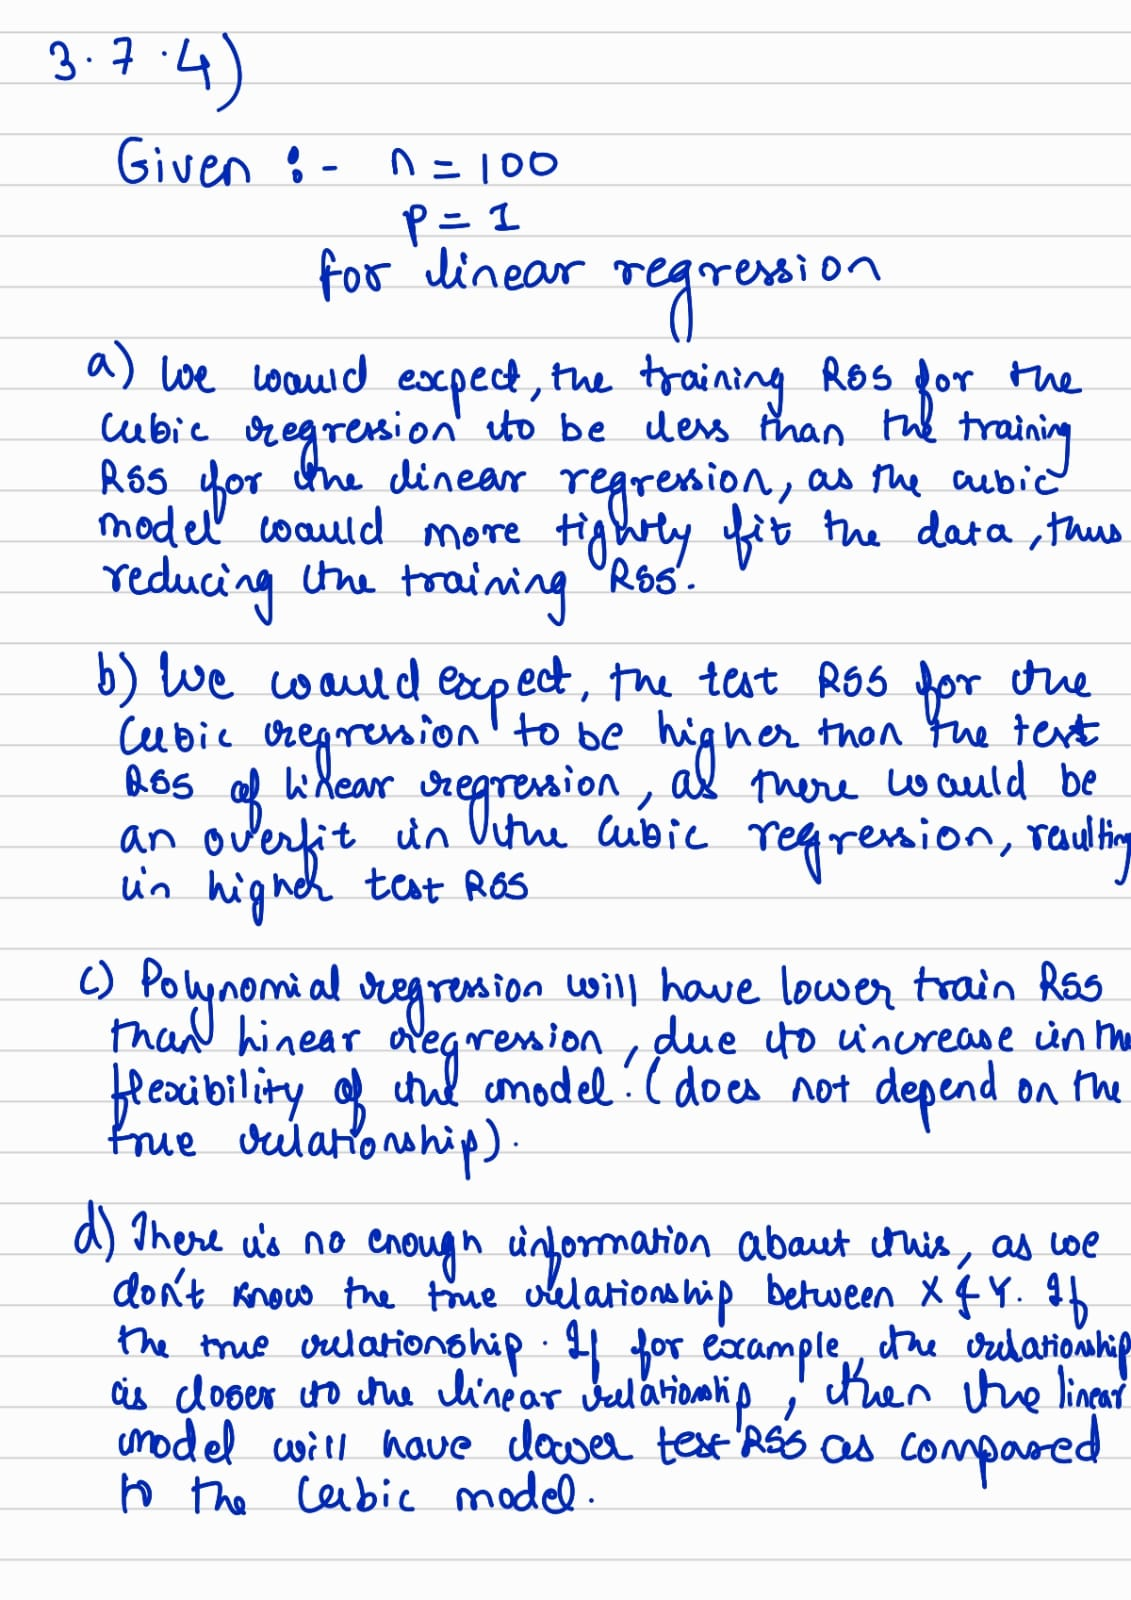